# Intializing Libraries

In [1]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 90.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


In [2]:
!pip install --upgrade scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tqdm import tqdm
#from imblearn.over_sampling import SMOTE
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [4]:
df = pd.read_csv('/kaggle/input/house-rent-dataset/House_Rent_Dataset.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,5/18/2022,2,10000.0,1100.0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,5/13/2022,2,20000.0,NaN,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
2,5/16/2022,2,17000.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,7/4/2022,2,10000.0,NaN,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,5/9/2022,2,7500.0,850.0,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [5]:
df.drop(['Posted On', 'Point of Contact', 'Tenant Preferred'], axis=1, inplace=True)
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Bathroom
0,2,10000.0,1100.0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,2.0
1,2,20000.0,NaN,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,1.0
2,2,17000.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,1.0
3,2,10000.0,NaN,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,1.0
4,2,7500.0,850.0,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,1.0


In [6]:
df.shape

(4746, 9)

In [7]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.741000e+03,4738.000000,4742.000000
mean,2.083860,3.502340e+04,967.936049,1.965837
std,0.832256,7.814214e+04,634.562635,0.884904
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4746 non-null   int64  
 1   Rent               4741 non-null   float64
 2   Size               4738 non-null   float64
 3   Floor              4746 non-null   object 
 4   Area Type          4739 non-null   object 
 5   Area Locality      4746 non-null   object 
 6   City               4746 non-null   object 
 7   Furnishing Status  4746 non-null   object 
 8   Bathroom           4742 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 333.8+ KB


In [9]:
print(df.isnull().sum())

BHK                  0
Rent                 5
Size                 8
Floor                0
Area Type            7
Area Locality        0
City                 0
Furnishing Status    0
Bathroom             4
dtype: int64


In [10]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

df.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Bathroom             0
dtype: int64

In [11]:
df['Floor'] = df['Floor'].apply(lambda x: str(x).split(' ')[0])
df['Floor'] = df['Floor'].replace('Ground', 0).replace('Upper', None)
df['Floor'] = pd.to_numeric(df['Floor'], errors='coerce')

In [12]:
df.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Bathroom
0,2,10000.0,1100.0,0.0,Super Area,Bandel,Kolkata,Unfurnished,2.0
2,2,17000.0,1000.0,1.0,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,1.0
4,2,7500.0,850.0,1.0,Carpet Area,South Dum Dum,Kolkata,Unfurnished,1.0
5,2,7000.0,600.0,0.0,Super Area,Thakurpukur,Kolkata,Unfurnished,2.0
6,2,10000.0,700.0,0.0,Super Area,Malancha,Kolkata,Unfurnished,2.0


In [13]:
target = df['Rent']
df.drop('Rent', axis=1, inplace=True)
df['Rent'] = target

In [14]:
df.head()

,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Bathroom,Rent
0,2,1100.0,0.0,Super Area,Bandel,Kolkata,Unfurnished,2.0,10000.0
2,2,1000.0,1.0,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,1.0,17000.0
4,2,850.0,1.0,Carpet Area,South Dum Dum,Kolkata,Unfurnished,1.0,7500.0
5,2,600.0,0.0,Super Area,Thakurpukur,Kolkata,Unfurnished,2.0,7000.0
6,2,700.0,0.0,Super Area,Malancha,Kolkata,Unfurnished,2.0,10000.0


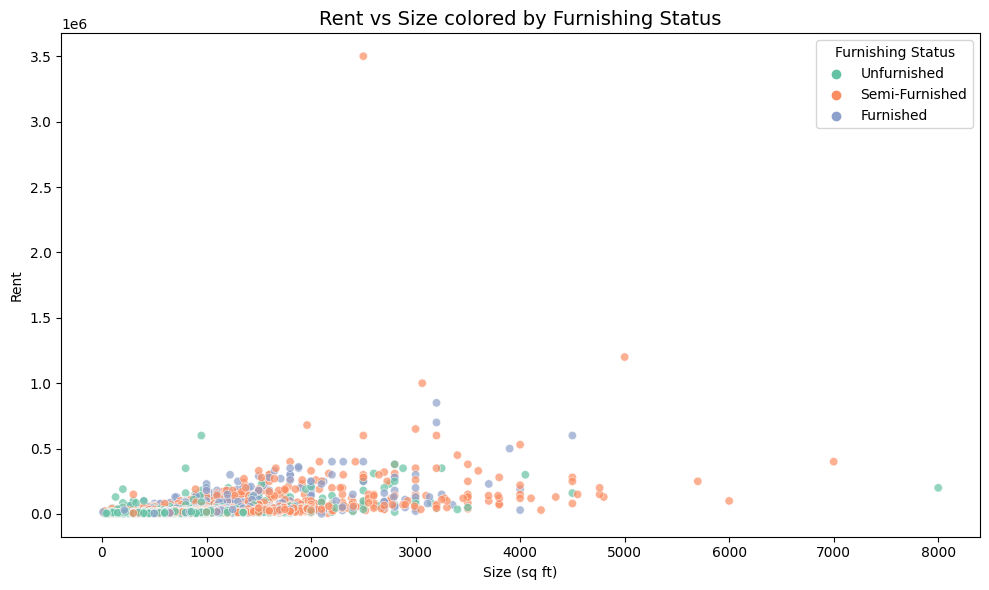

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Size", y="Rent", hue="Furnishing Status", palette="Set2", alpha=0.7)
plt.title("Rent vs Size colored by Furnishing Status", fontsize=14)
plt.xlabel("Size (sq ft)")
plt.ylabel("Rent")
plt.tight_layout()
plt.show()

In [16]:
Q1 = df['Rent'].quantile(0.25)
Q3 = df['Rent'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['Rent'] >= lower_bound) & (df['Rent'] <= upper_bound)]

In [17]:
print(df.isnull().sum())

BHK                   0
Size                  0
Floor                27
Area Type             0
Area Locality         0
City                  0
Furnishing Status     0
Bathroom              0
Rent                  0
dtype: int64


In [18]:
df.dropna(inplace=True)
print(df.isnull().sum())

BHK                  0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Bathroom             0
Rent                 0
dtype: int64


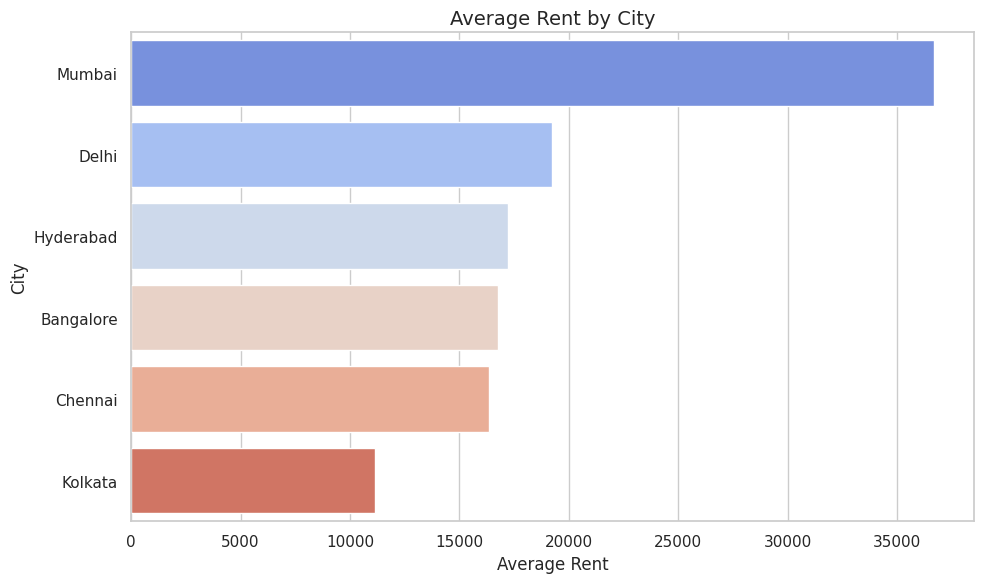

In [19]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
avg_rent_by_city = df.groupby("City")["Rent"].mean().sort_values(ascending=False)
sns.barplot(x=avg_rent_by_city.values, y=avg_rent_by_city.index, palette="coolwarm")
plt.title("Average Rent by City", fontsize=14)
plt.xlabel("Average Rent")
plt.ylabel("City")
plt.tight_layout()
plt.show()


In [20]:
scaler = StandardScaler()
cols_to_scale = ['Size', 'Floor', 'Rent']

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [21]:
df = df.drop(columns=["Area Locality"])
label_cols = ['Area Type', 'City', 'Furnishing Status']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [22]:
df.head()

,BHK,Size,Floor,Area Type,City,Furnishing Status,Bathroom,Rent
0,2,0.471153,-0.716145,2,4,2,2.0,-0.671424
2,2,0.264622,-0.439761,2,4,1,1.0,-0.164244
4,2,-0.045174,-0.439761,1,4,2,1.0,-0.852560
5,2,-0.561501,-0.716145,2,4,2,2.0,-0.888788
6,2,-0.354970,-0.716145,2,4,2,2.0,-0.671424


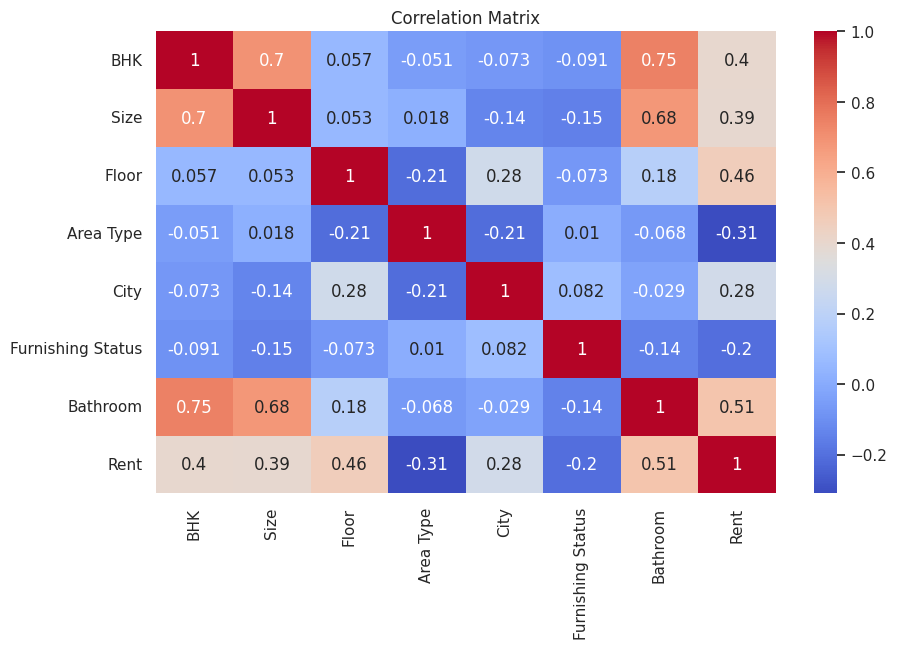

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

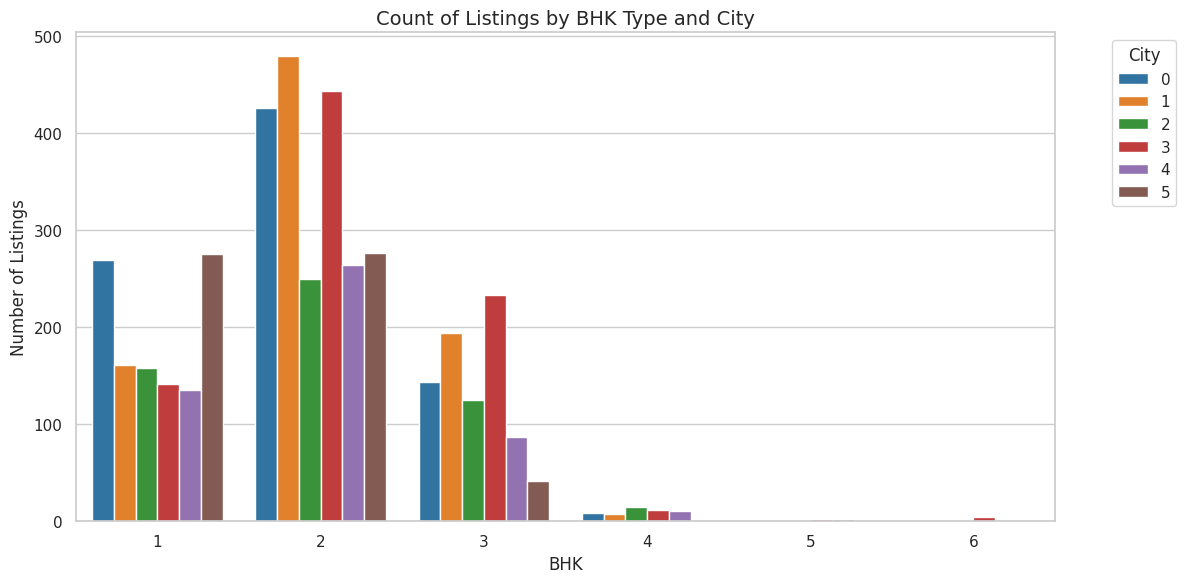

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="BHK", hue="City", palette="tab10")
plt.title("Count of Listings by BHK Type and City", fontsize=14)
plt.xlabel("BHK")
plt.ylabel("Number of Listings")
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [25]:
y=df['Rent']
x=df.drop('Rent',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [26]:
print("Training feature set size:",x_train.shape)
print("Test feature set size:",x_test.shape)
print("Training label set size:",y_train.shape)
print("Test lable set size:",y_test.shape)

Training feature set size: (2919, 7)
Test feature set size: (1251, 7)
Training label set size: (2919,)
Test lable set size: (1251,)


In [27]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Regression': SVR()
}


modelName = []
model_accuracy = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    modelName.append(model_name)
    y_pred = model.predict(x_test)

    model_accuracy.append([
        mean_absolute_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred),
        r2_score(y_test, y_pred)
    ])

Final_accuracy = pd.DataFrame(model_accuracy, index=modelName, columns=['MAE', 'MSE', 'R2 Score'])

print("Evaluation Table")
print(Final_accuracy)

Evaluation Table
                                MAE       MSE  R2 Score
Linear Regression          0.520854  0.496369  0.514762
Random Forest              0.375733  0.296219  0.710423
Decision Tree              0.472920  0.497267  0.513884
Support Vector Regression  0.379477  0.328857  0.678517


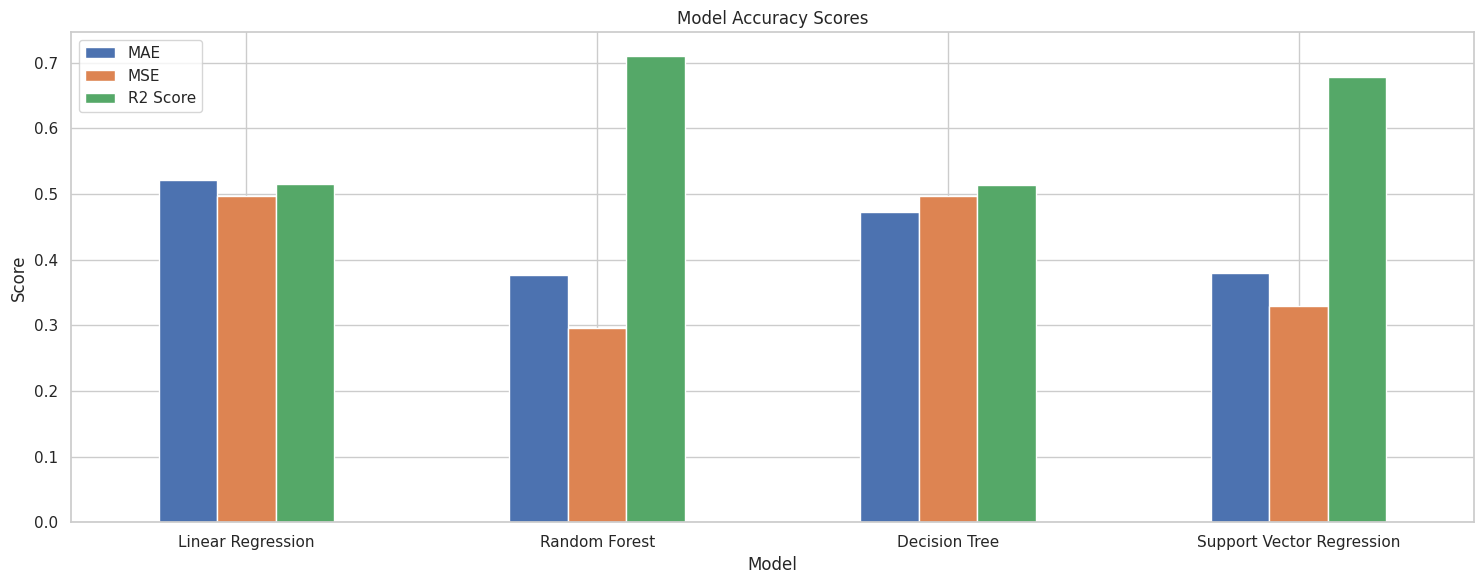

In [28]:
import matplotlib.pyplot as plt
Final_accuracy.plot(kind='bar', figsize=(15, 6))
plt.title('Model Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()